Los objetivos de hoy son:
    
1. Buscar un conjunto de datos a analizar:
        
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, 
primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a 
la hora de realizar predicciones en las clases de regresión lineal múltiple. 
Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.
        
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.
Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Datos/possum.csv", index_col=0).reset_index()

Elegimos este Dataframe por tener variables numéricas diferentes y alguna categórica como pide el enunciado

In [3]:
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


Vemos las etiquetas de nuestras columnas

In [4]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

Vemos el numero de filas y columnas de nuestro Dataframe

In [5]:
print(f'El número de filas es: {df.shape[0]} y el número de columnas es: {df.shape[1]}')

El número de filas es: 104 y el número de columnas es: 14


Vemos qué porcentaje de nulos contiene nuestro Dataframe

In [6]:
nulos =pd.DataFrame(df.isnull().sum()*100/df.shape[0])

In [7]:
nulos.rename(columns={0:'% nulos'}, inplace=True)
nulos

,% nulos
case,0.000000
site,0.000000
Pop,0.000000
sex,0.000000
age,1.923077
hdlngth,0.000000
skullw,0.000000
totlngth,0.000000
taill,0.000000
footlgth,0.961538


Vemos que tipo de datos contiene nuestro Dataframe

In [8]:
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

Extraemos la info general del Dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [10]:
filtro = df[df["age"].isnull()]
filtro

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [11]:
# Decidimos rellenar los nulos cn la mediana para edad

mediana_edad = df["age"].median()
mediana_edad

3.0

In [12]:
mediana_dientes = df["totlngth"].median()
mediana_dientes

88.0

In [13]:
mediana_pies = df["footlgth"].median()
mediana_pies

68.0

In [14]:
df["age"] = df["age"].fillna(mediana_edad)

In [15]:
df["totlngth"] = df["totlngth"].fillna(mediana_dientes)

In [16]:
df["footlgth"] = df["footlgth"].fillna(mediana_dientes)

In [17]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Analizamos los principales estadísticos de nuestro Dataframe

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case,104.0,NaN,NaN,NaN,52.5,30.166206,1.0,26.75,52.5,78.25,104.0
site,104.0,NaN,NaN,NaN,3.625,2.349086,1.0,1.0,3.0,6.0,7.0
Pop,104,2,other,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,104,2,m,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,104.0,NaN,NaN,NaN,3.817308,1.894112,1.0,2.75,3.0,5.0,9.0
hdlngth,104.0,NaN,NaN,NaN,92.602885,3.573349,82.5,90.675,92.8,94.725,103.1
skullw,104.0,NaN,NaN,NaN,56.883654,3.113426,50.0,54.975,56.35,58.1,68.6
totlngth,104.0,NaN,NaN,NaN,87.088462,4.310549,75.0,84.0,88.0,90.0,96.5
taill,104.0,NaN,NaN,NaN,37.009615,1.959518,32.0,35.875,37.0,38.0,43.0
footlgth,104.0,NaN,NaN,NaN,68.647115,4.775218,60.3,64.65,68.1,72.55,88.0


Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Hipotesis No Nula: 

vamos a predecir la longitud de la cabeza, en base a otras partes del cuerpo.

La variable respuesta/dependiente (hdlngth)
La variable independiente/predictora (tamaño dientes) + ...

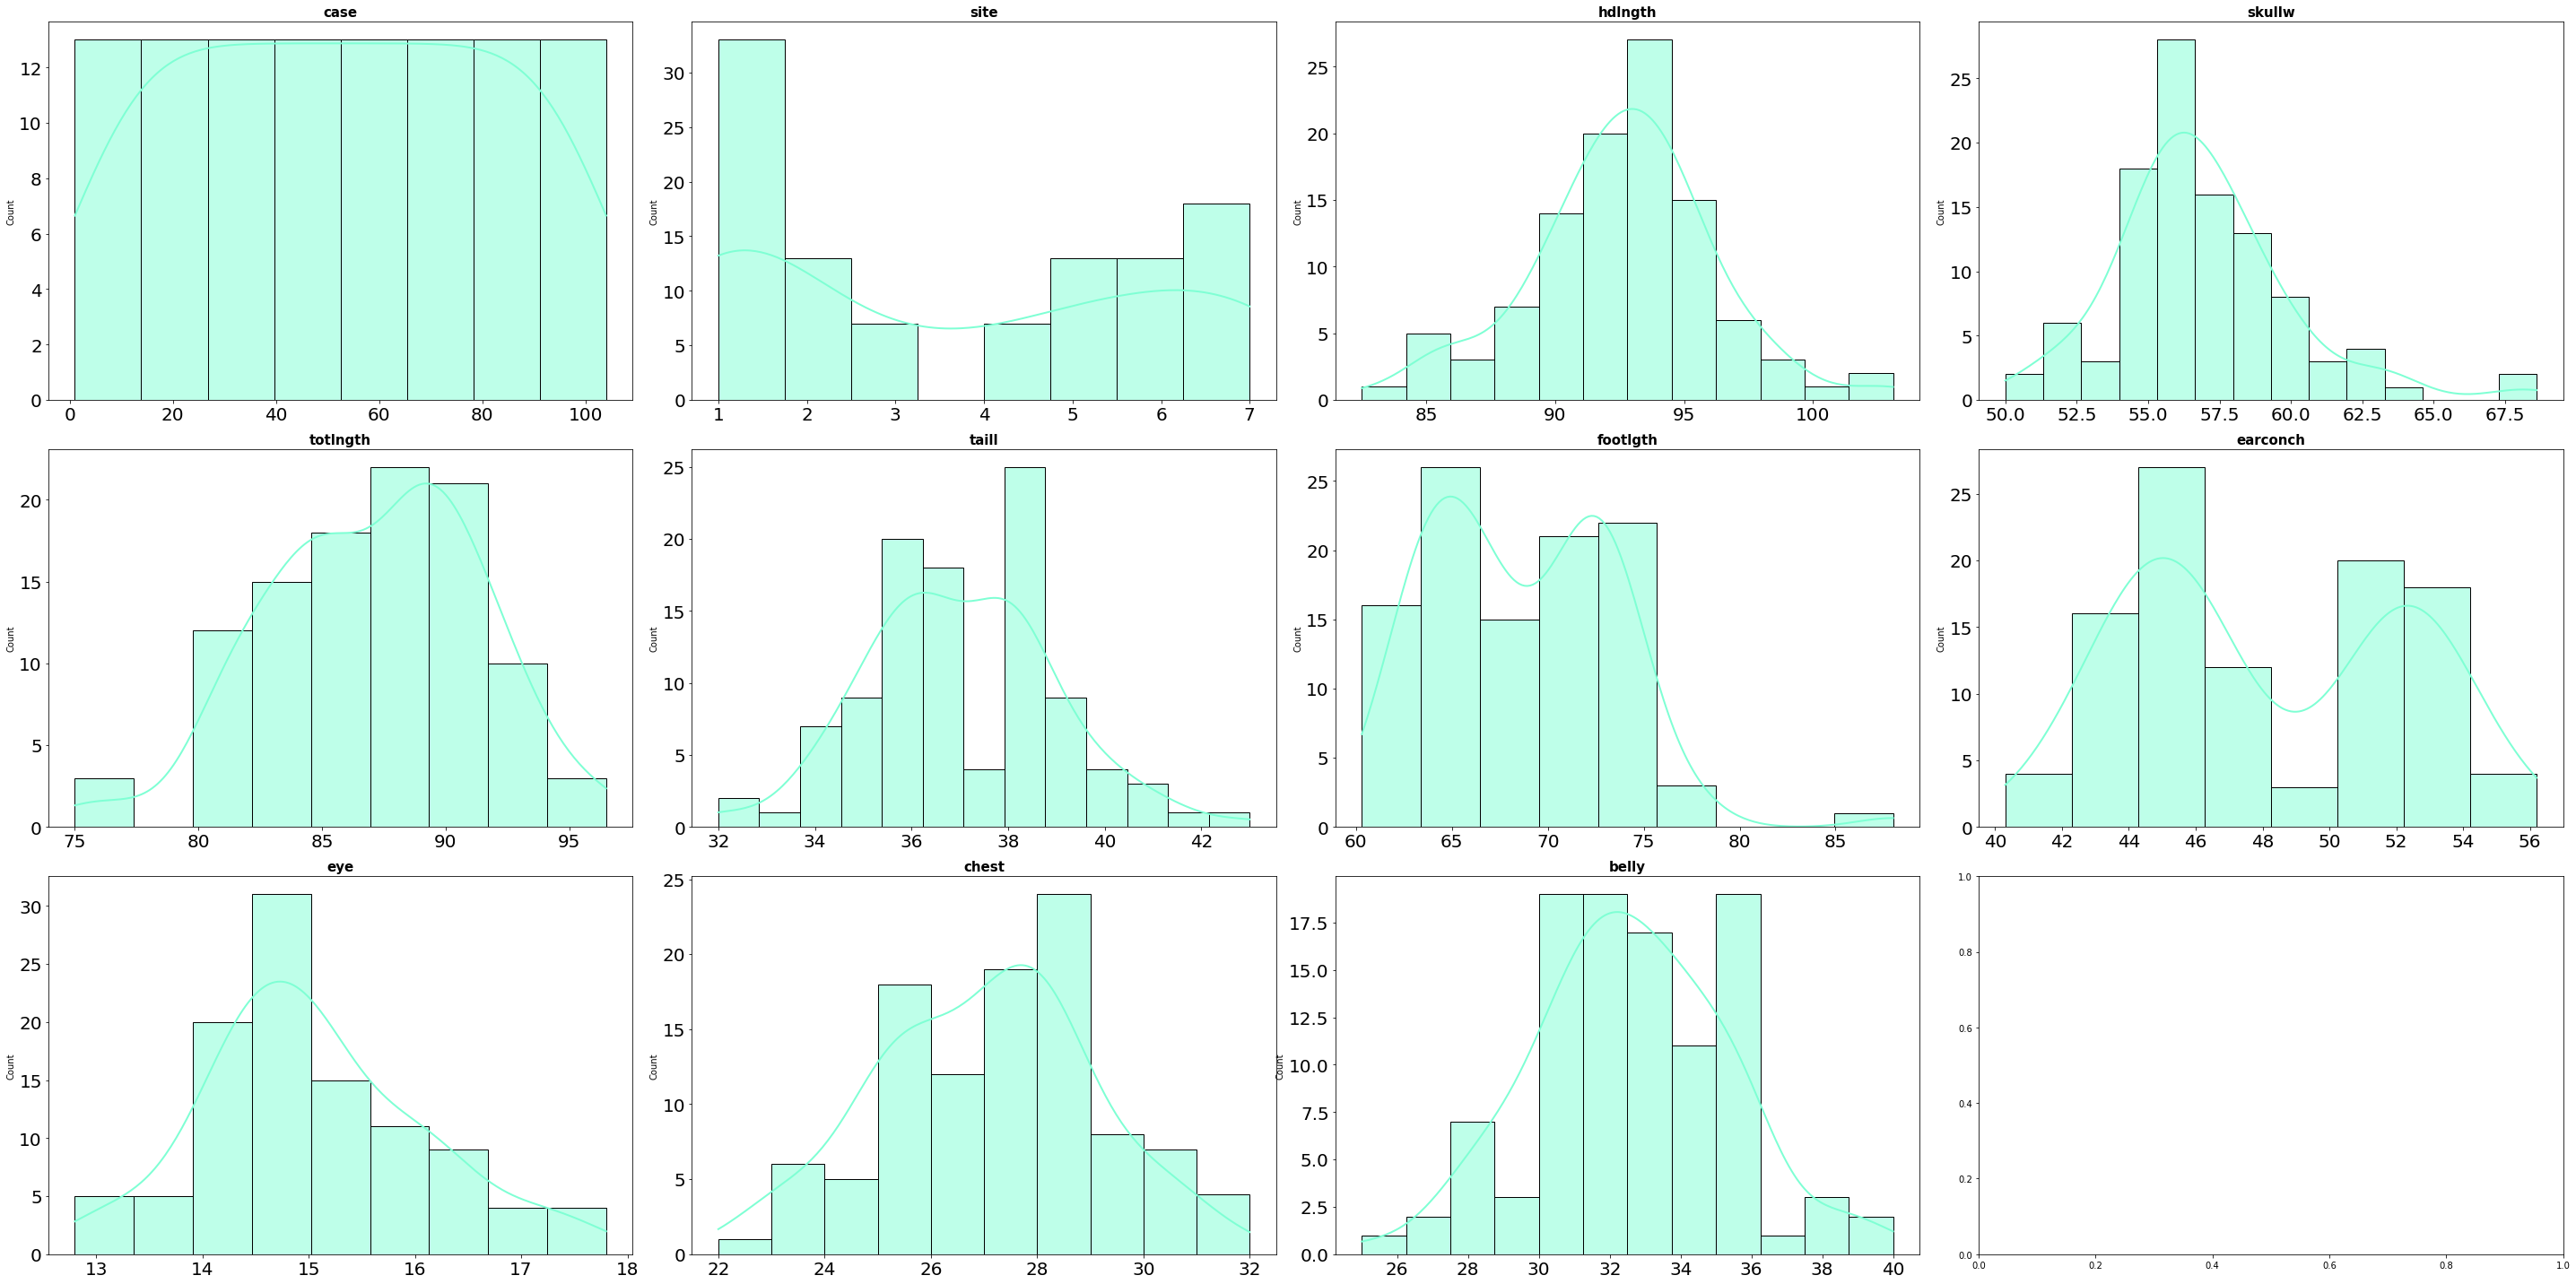

In [19]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (40, 20))


axes = axes.flat

numerics = ["float64", "int64"]

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("age")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

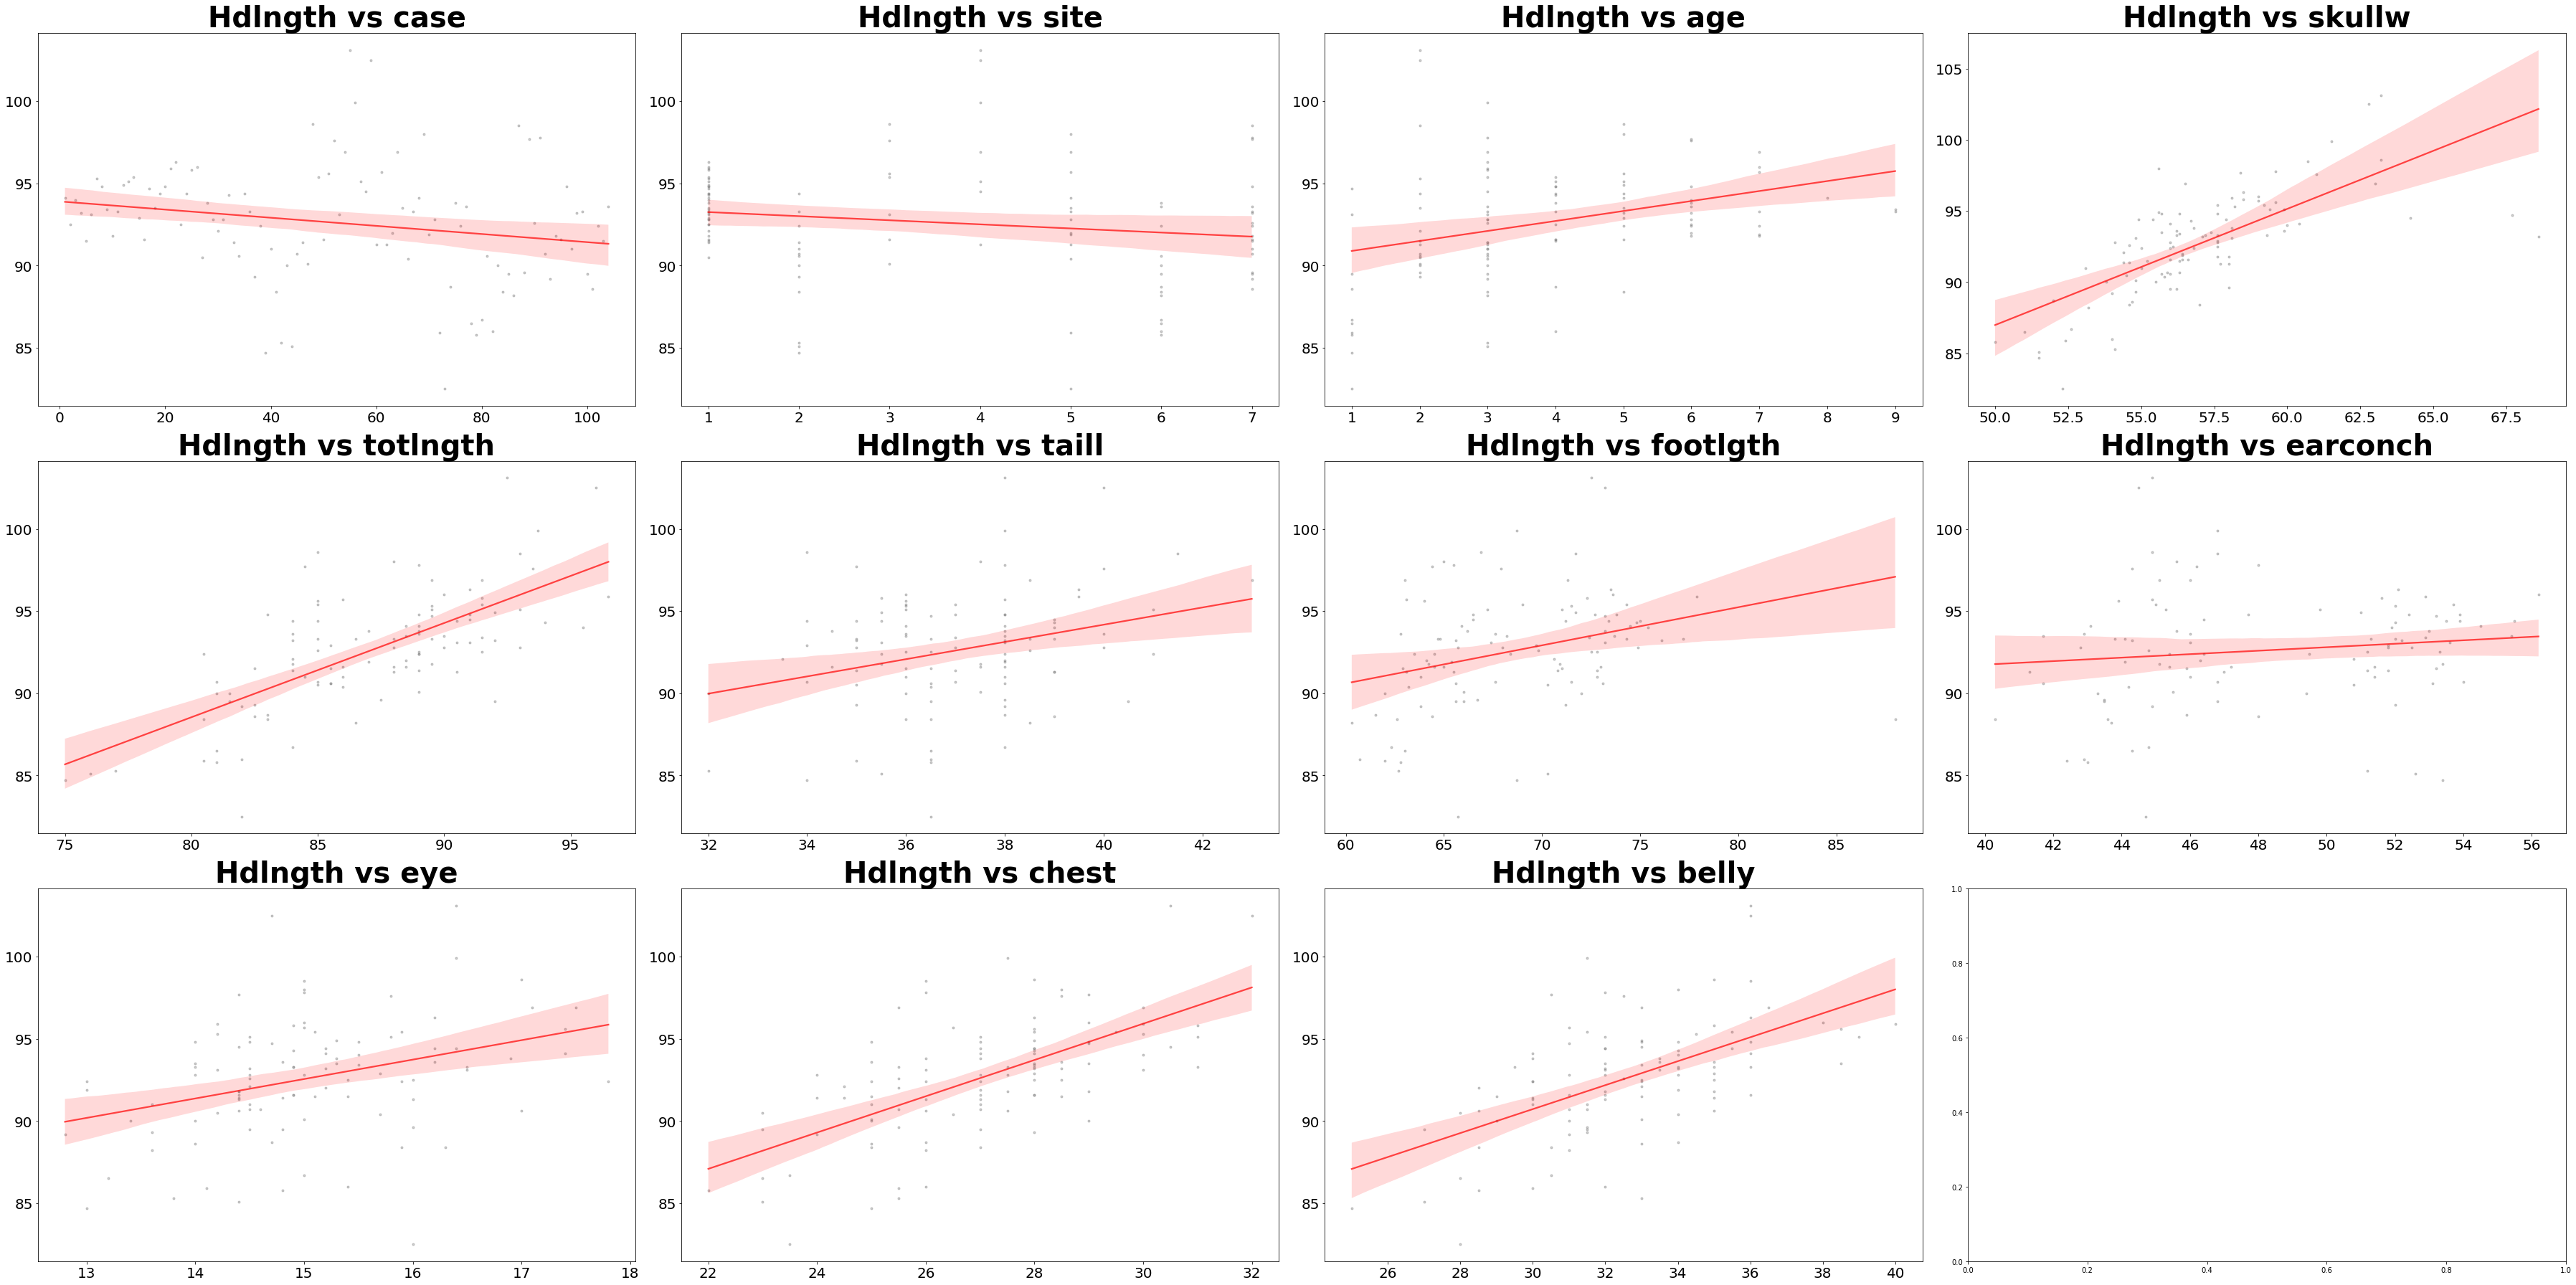

In [20]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (50, 25))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("hdlngth")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["hdlngth"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Hdlngth vs {colum}", fontsize = 40, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

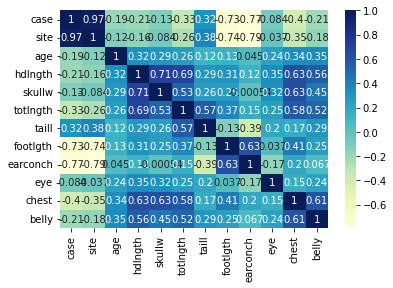

In [21]:

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

/var/folders/4t/jwz4fg1j3ps9fv1187b_jzr40000gn/T/ipykernel_5554/3757257610.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


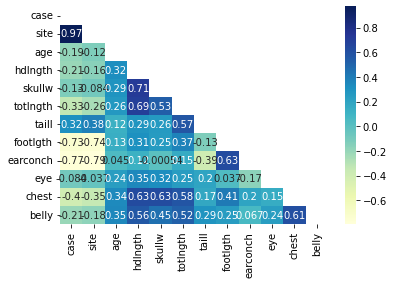

In [22]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

Analizamos al roedor y mamífero Possum (Zarigüeya) a través de nuestro Dataset y llegamos a las siguientes conclusiones:

 - Entre 0.10 y 0.29: Hay correlación débil entre la longitud de la cabeza (hdlngth) y el sitio, case


- Entre 0.30 y 0.60: Hay correlación moderada entre la longitud de la cabeza (hdlngth) y eye, footlngth, age


- Entre 0.60 y 1: Hay una correlación alta entre la longitud de la cabeza (hdlngth) y el tamaño de calavera, pecho y longitud de dientes

In [23]:
df.to_csv("./Datos/possum2a.csv")